In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("terrorism.csv")


<ipython-input-5-b00ab265fd96>:1: DtypeWarning: Columns (4,6,8,10,11,12,17,18,24,29,31,33,35,37,38,39,41,43,45,46,47,49,51,53,54,55,57,58,59,60,64,73,76,82,84,86,88,90,92,94,96,97,106,108,114,115,121,123,125,126,127,128,129,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("terrorism.csv")


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970000e+11,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970000e+11,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970000e+11,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.shape

(9998, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:

df.rename(columns={'eventid':'EID','iyear':'Year','imonth':'Month','iday':'Day','approxdate':'Approxdate','extended':'Extend','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [ ]:

df.isnull().sum()

Year           2000
Month          2000
Day            2000
Country        2000
state          2032
Region         2000
city           2000
latitude       2220
longitude      2220
AttackType     2000
Killed         2918
Wounded        4163
Target         2067
Summary        9173
Group          2000
Target_type    2000
Weapon_type    2000
Motive         9409
dtype: int64

In [ ]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970.0,7.0,2.0,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970.0,0.0,0.0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970.0,1.0,0.0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970.0,1.0,0.0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970.0,1.0,0.0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
print("Nation with the most assaults : ",df['Country'].value_counts().idxmax())
print("The most-attacked city : ",df['city'].value_counts().index[1])
print("Area with the most assaults:",df['Region'].value_counts().idxmax())
print("The most attacks-per-year:",df['Year'].value_counts().idxmax())
print("Attacks per month peak:",df['Month'].value_counts().idxmax())
print("With the most assaults as a group:",df['Group'].value_counts().index[1])
print("Attacks of Most Types:",df['AttackType'].value_counts().idxmax())

Nation with the most assaults :  United Kingdom
The most-attacked city :  New York City
Area with the most assaults: Western Europe
The most attacks-per-year: 1978.0
Attacks per month peak: 5.0
With the most assaults as a group: Irish Republican Army (IRA)
Attacks of Most Types: Bombing/Explosion


In [ ]:
df['Year'].value_counts(dropna=False).sort_index()

1970.0     645
1971.0     464
1972.0     533
1973.0     472
1974.0     577
1975.0     729
1976.0     897
1977.0    1229
1978.0    1459
1979.0     993
NaN       2000
Name: Year, dtype: int64

In [ ]:
df[['Killed', 'Wounded']] = df[['Killed', 'Wounded']].fillna(df[['Killed', 'Wounded']].mean())
df[['Killed','Wounded']].isnull().any()

Killed     False
Wounded    False
dtype: bool

In [ ]:
df = df.dropna(subset=['Summary'])
df = df.dropna(subset=['Motive'])

In [ ]:
df[['Summary','Motive']].isna().any()

Summary    False
Motive     False
dtype: bool

In [ ]:
df['Day'].unique()

array([ 1.,  2.,  3.,  6.,  9., 12., 13., 19., 22., 25., 26., 27., 30.,
        4.,  8., 15., 16., 17., 21., 23., 24.,  5., 10., 11., 14., 20.,
       31.,  0., 29.,  7., 18., 28.])

In [ ]:
df['Day'] = df['Day'].replace(0,np.nan)
df = df.dropna(subset=['Day'])

In [ ]:
# Checking no. of unique values in Day Column
print(df['Day'].nunique())

31


In [ ]:
# Checking for null values
print(df['Day'].isnull().any())

False


In [ ]:
df.isnull().sum()

Year            0
Month           0
Day             0
Country         0
state           0
Region          0
city            0
latitude        0
longitude       0
AttackType      0
Killed          0
Wounded         0
Target         12
Summary         0
Group           0
Target_type     0
Weapon_type     0
Motive          0
dtype: int64

In [ ]:
df.reset_index(inplace=True,drop=True)
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970.0,1.0,1.0,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
1,1970.0,1.0,2.0,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
2,1970.0,1.0,3.0,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft
3,1970.0,1.0,6.0,United States,Colorado,North America,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War
4,1970.0,1.0,9.0,United States,Puerto Rico,North America,Rio Piedras,18.386932,-66.061127,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         583 non-null    float64
 1   Month        583 non-null    float64
 2   Day          583 non-null    float64
 3   Country      583 non-null    object 
 4   state        583 non-null    object 
 5   Region       583 non-null    object 
 6   city         583 non-null    object 
 7   latitude     583 non-null    float64
 8   longitude    583 non-null    float64
 9   AttackType   583 non-null    object 
 10  Killed       583 non-null    float64
 11  Wounded      583 non-null    float64
 12  Target       571 non-null    object 
 13  Summary      583 non-null    object 
 14  Group        583 non-null    object 
 15  Target_type  583 non-null    object 
 16  Weapon_type  583 non-null    object 
 17  Motive       583 non-null    object 
dtypes: float64(7), object(11)
memory usage: 82.1+ KB


In [ ]:
df_cat = df.select_dtypes(include=['object']).columns.tolist()
df_cat

['Country',
 'state',
 'Region',
 'city',
 'AttackType',
 'Target',
 'Summary',
 'Group',
 'Target_type',
 'Weapon_type',
 'Motive']

In [ ]:
df_num = df.select_dtypes(exclude=['object']).columns.tolist()
df_num

['Year', 'Month', 'Day', 'latitude', 'longitude', 'Killed', 'Wounded']

In [ ]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,1972.289880,5.653516,14.838765,36.728343,-89.869939,0.266612,0.423343
std,2.697845,3.375170,8.723792,7.600638,25.664110,1.334089,2.221212
min,1970.000000,1.000000,1.000000,7.726018,-157.818968,0.000000,0.000000
25%,1970.000000,3.000000,7.000000,34.097866,-118.124100,0.000000,0.000000
50%,1971.000000,5.000000,15.000000,38.952590,-84.956230,0.000000,0.000000
75%,1974.000000,8.000000,22.000000,40.791005,-73.931351,0.000000,0.000000
max,1979.000000,12.000000,31.000000,53.076694,85.781004,22.000000,36.000000


In [ ]:
df.describe(include='O')


,Country,state,Region,city,AttackType,Target,Summary,Group,Target_type,Weapon_type,Motive
count,583,583,583,583,583,571,583,583,583,583,583
unique,9,51,6,213,8,521,582,67,19,7,259
top,United States,California,North America,New York City,Bombing/Explosion,department store,8/18/1972: In a series of five related inciden...,Left-Wing Militants,Business,Explosives,Unknown
freq,573,135,573,87,279,14,2,119,142,278,59


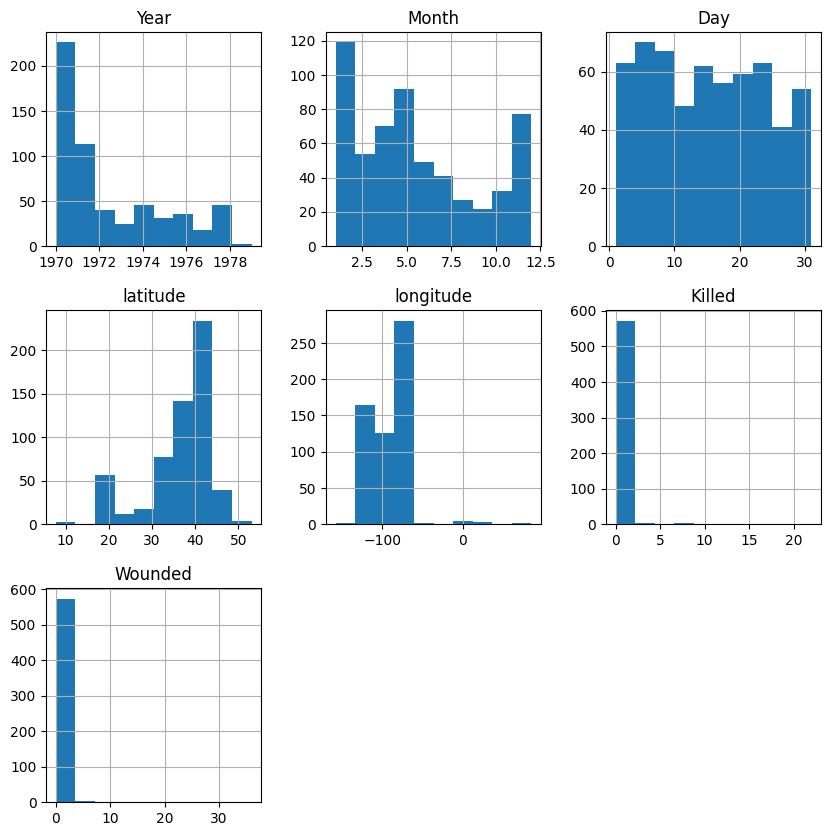

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()

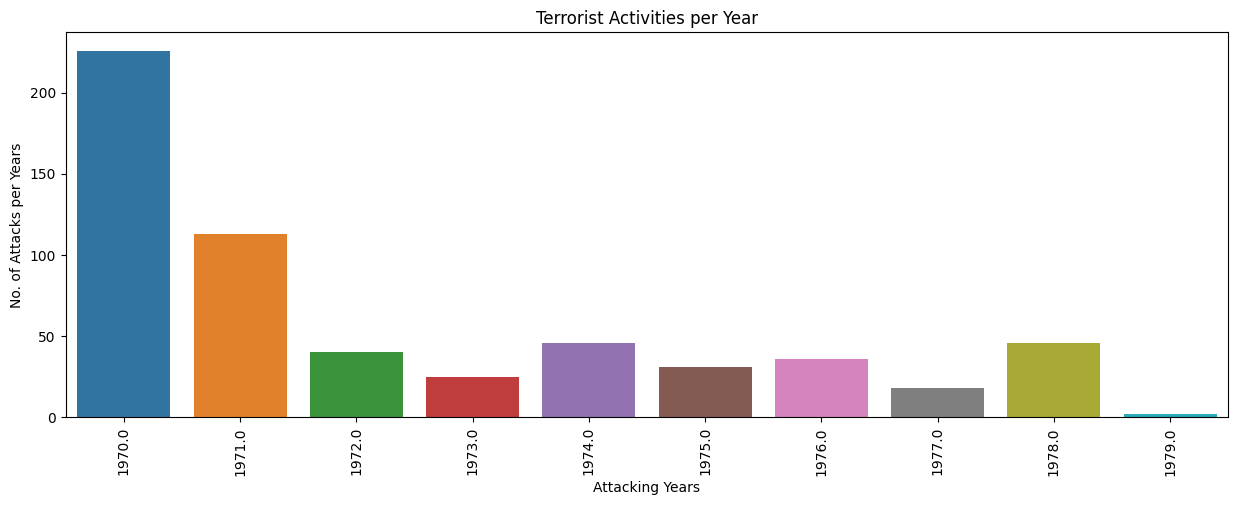

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(x = df['Year'])
plt.title('Terrorist Activities per Year')
plt.xlabel('Attacking Years')
plt.ylabel('No. of Attacks per Years')
plt.xticks(rotation=90)
plt.show()

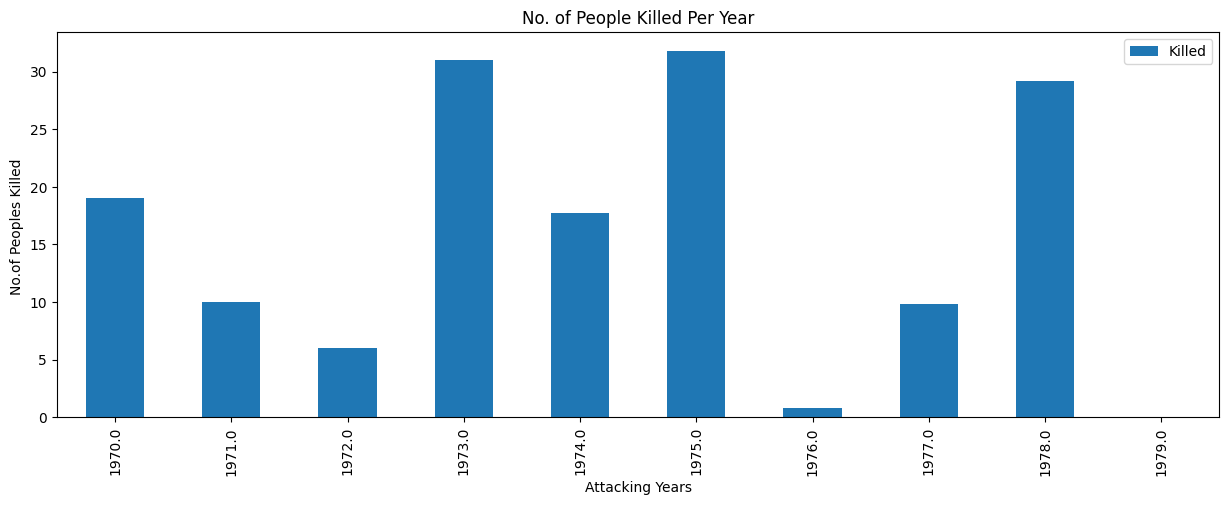

In [ ]:
kill_per_year = df[['Year','Killed']].groupby('Year').sum()
kill_per_year.plot(kind='bar', figsize=(15,5), title = 'No. of People Killed Per Year')
plt.xlabel('Attacking Years')
plt.ylabel('No.of Peoples Killed ')
plt.show()

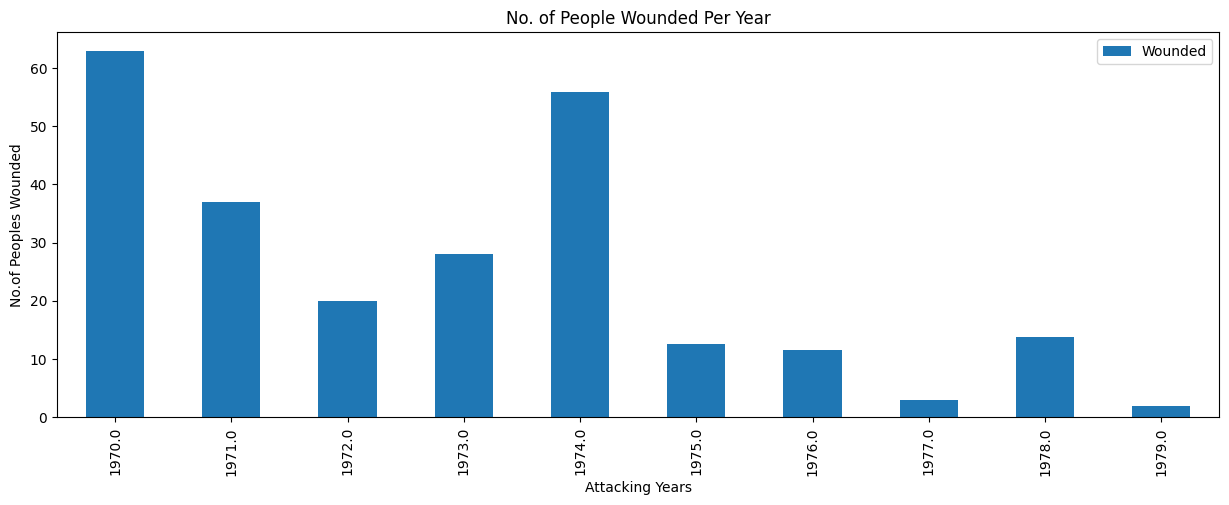

In [ ]:
wounded_per_year = df[['Year','Wounded']].groupby('Year').sum()
wounded_per_year.plot(kind='bar', figsize=(15,5), title = 'No. of People Wounded Per Year')
plt.xlabel('Attacking Years')
plt.ylabel('No.of Peoples Wounded')
plt.show()

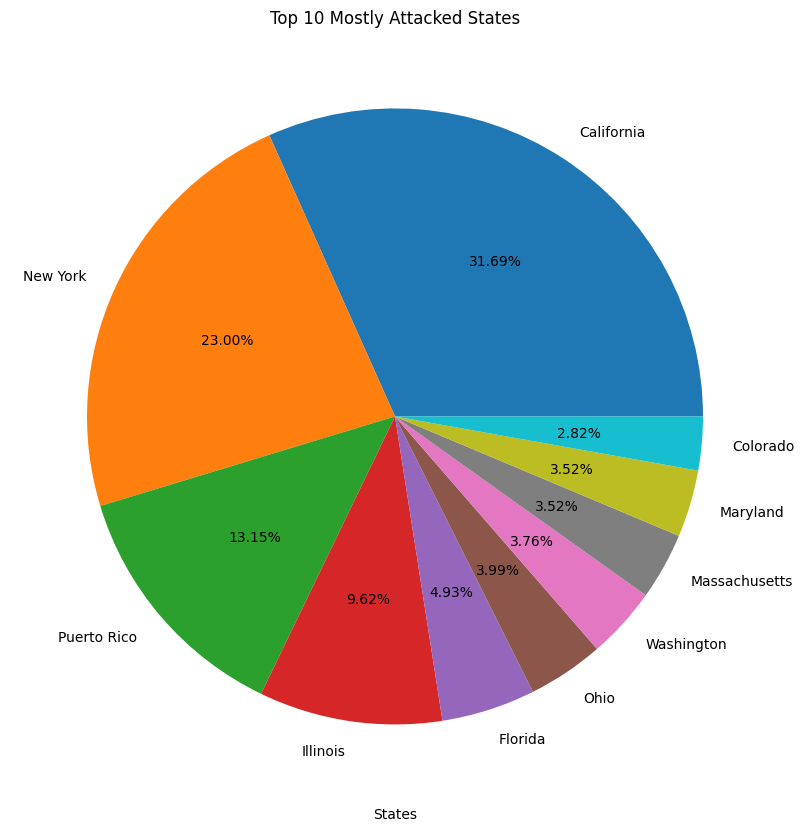

In [ ]:
plt.figure(figsize=(15,10))
most_attack_countries = df['state'].value_counts().head(10)
most_attack_countries.plot(kind='pie',autopct = '%.2f%%')
plt.title('Top 10 Mostly Attacked States')
plt.xlabel('States')
plt.ylabel(None)
plt.show()

In [ ]:
df['Target'].value_counts()

department store                                                                                            14
bank                                                                                                         9
Cairo Police Headquarters                                                                                    4
police vehicle                                                                                               4
Selective Service Headquarters, Portland Oregon                                                              3
                                                                                                            ..
San Jose police officer                                                                                      1
Home of Mr. & Mrs. Franklin Williams                                                                         1
Army Recruiting Trailer, Camden New Jersey                                                                   1
S

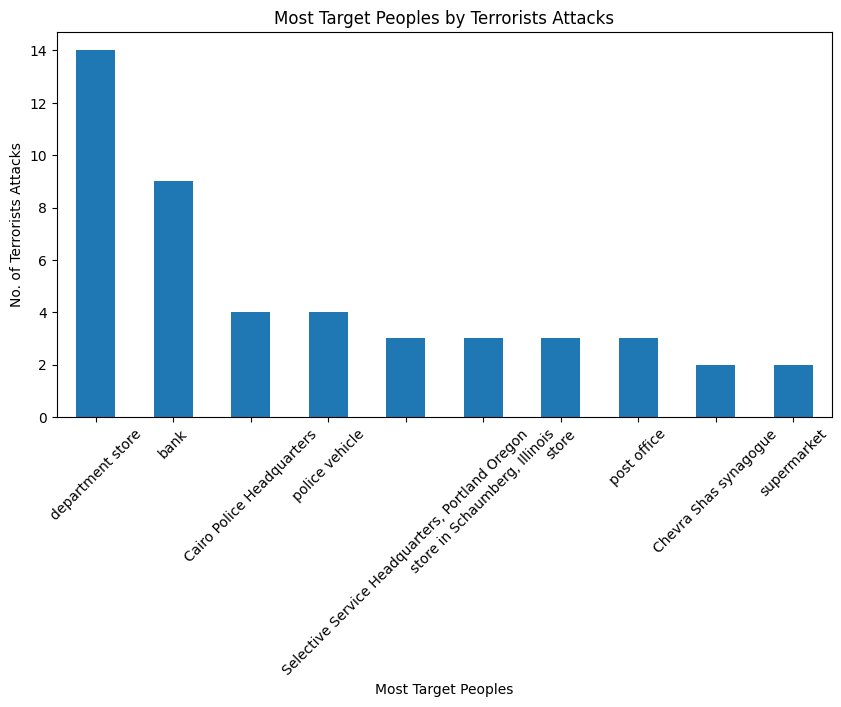

In [ ]:
plt.figure(figsize=(10,5))
most_target_peoples = df['Target'].value_counts().head(10)
most_target_peoples.plot(kind='bar')
plt.title('Most Target Peoples by Terrorists Attacks')
plt.xlabel('Most Target Peoples')
plt.ylabel('No. of Terrorists Attacks')
plt.xticks(rotation=45)
plt.show()

In [ ]:
terr_groups = df['Group'].value_counts()
terr_groups

Left-Wing Militants                                   119
Black Nationalists                                     53
Fuerzas Armadas de Liberacion Nacional (FALN)          41
White extremists                                       41
Unknown                                                38
                                                     ... 
Revolutionary Force Seven                               1
Stop the War Coalition                                  1
The World United Formosans for Independence (WUFI)      1
Revolutionary Force 9                                   1
Croatian Nationalists                                   1
Name: Group, Length: 67, dtype: int64

In [ ]:
targets = df['Target_type'].value_counts()
targets

Business                          142
Military                           89
Government (General)               84
Private Citizens & Property        78
Police                             62
Educational Institution            49
Religious Figures/Institutions     14
Journalists & Media                10
Utilities                          10
NGO                                 8
Abortion Related                    8
Unknown                             6
Airports & Aircraft                 5
Transportation                      4
Telecommunication                   4
Government (Diplomatic)             4
Food or Water Supply                4
Violent Political Party             1
Terrorists/Non-State Militia        1
Name: Target_type, dtype: int64

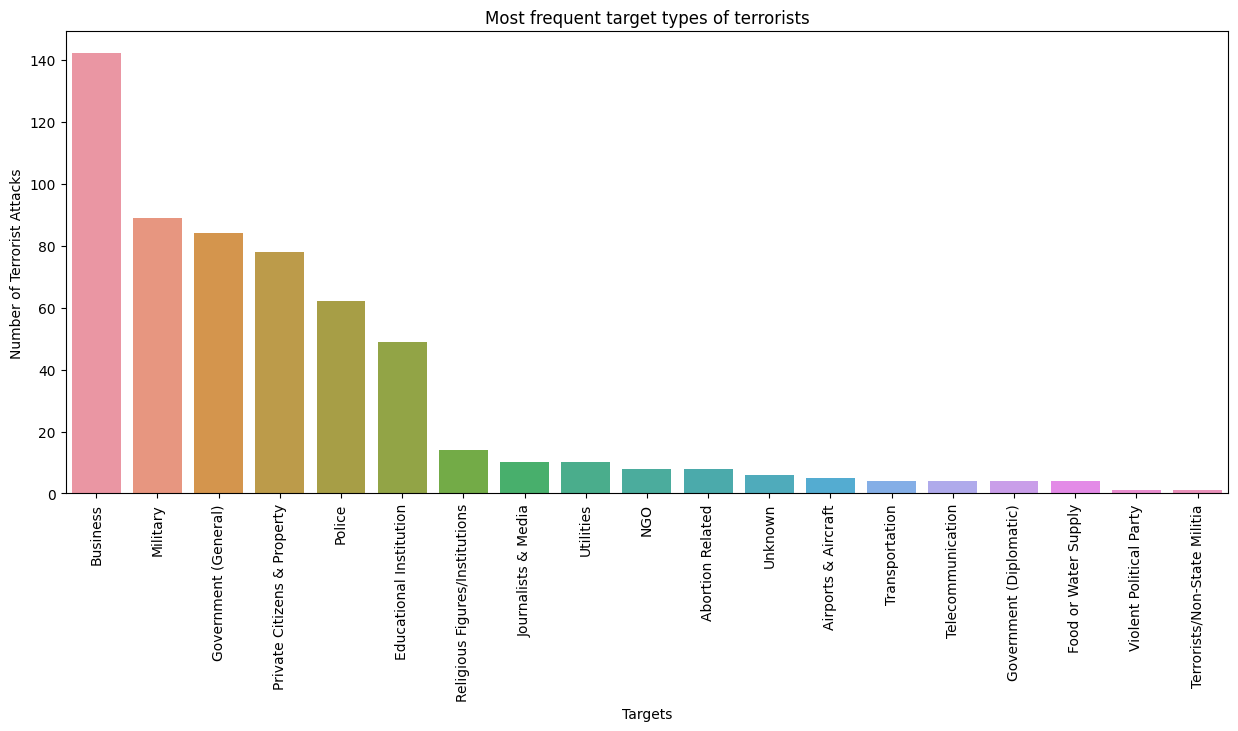

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x = targets.index, y = targets.values)
plt.title("Most frequent target types of terrorists")
plt.xlabel("Targets")
plt.ylabel("Number of Terrorist Attacks")
plt.xticks(rotation=90)
plt.show()


<ipython-input-39-da0a08ac4ce3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis')


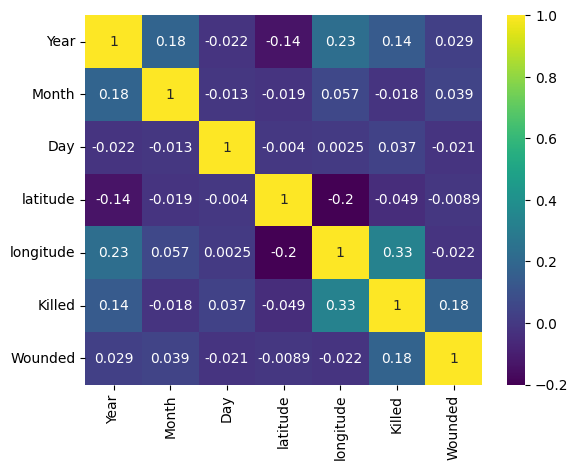

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()
